In [ ]:
import cv2
import math
import PIL
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Идея
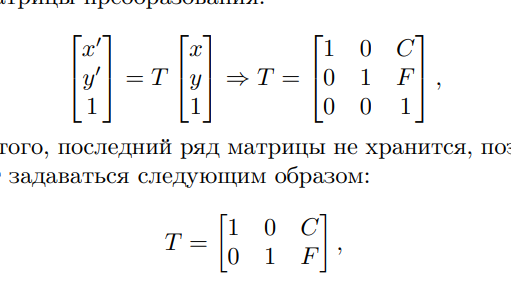

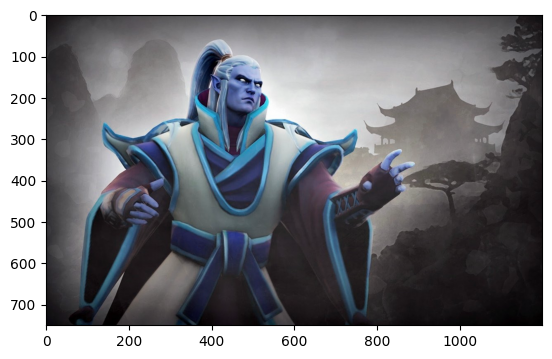

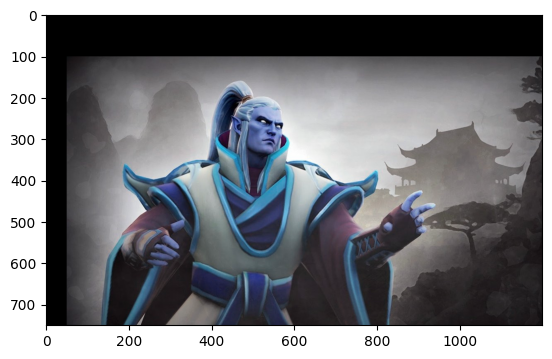

In [ ]:
#Сдвиг Изобржаения при помощи афинного преобразования
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
T = np.float32([[1, 0, 50],[0, 1, 100]])
I_shift = cv2.warpAffine(imageObj, T, (cols, rows))
plt.imshow(I_shift)
plt.show()

Идея:
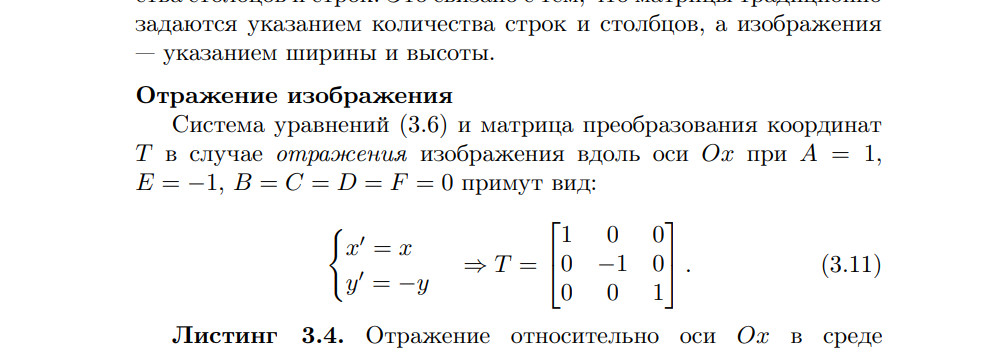

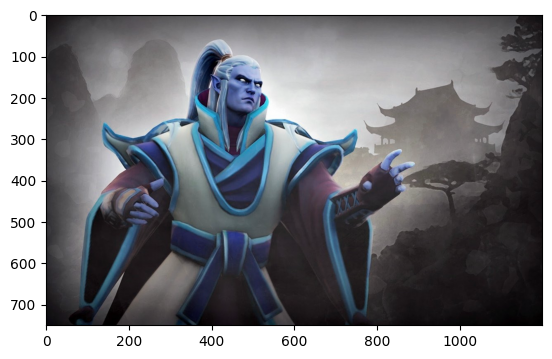

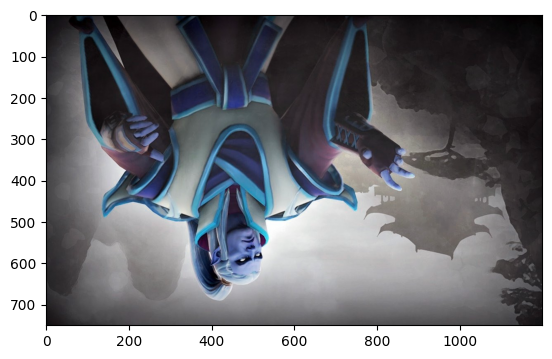

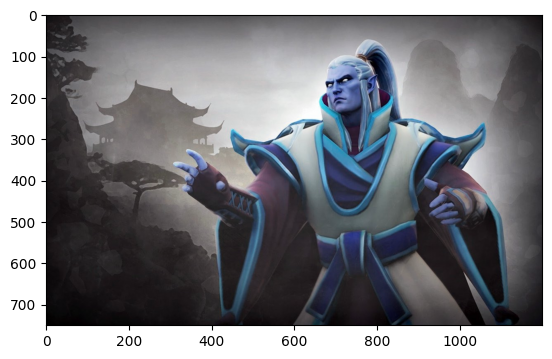

In [ ]:
#Отображение изображения
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
T = np.float32([[1, 0, 0],[0 , -1 , rows - 1]])
I_reflect_1 = cv2.warpAffine(imageObj, T, (cols, rows))
plt.imshow(I_reflect_1)
plt.show()
# ПРИ ПОМОЩИ flip
I_reflect = cv2.flip(imageObj, 1) # можно менять второй параметр
plt.imshow(I_reflect)
plt.show()

Идея: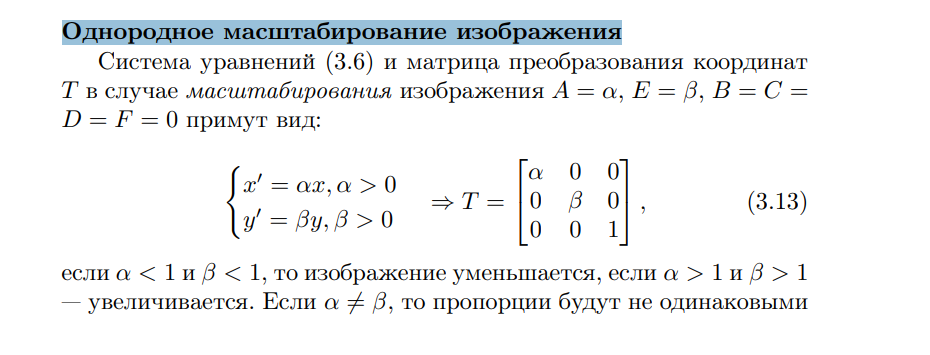

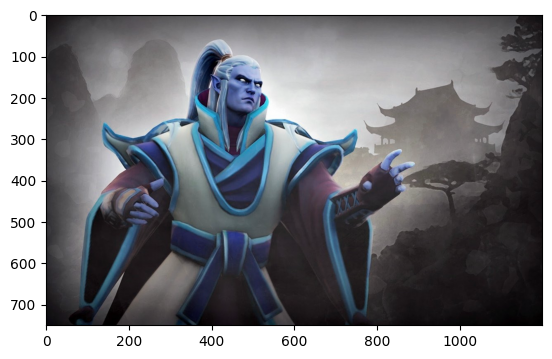

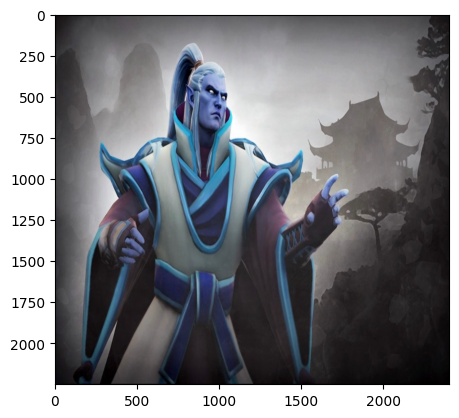

In [ ]:
#Однородное масштабирование изображения
imageObj = cv2.imread('обработка.jpg')
alfa, betta = 2, 3
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
T = np.float32([[alfa, 0, 0],[0 , betta ,0]])
I_scale = cv2.warpAffine(imageObj, T, (cols * alfa, betta * rows))
plt.imshow(I_scale)
plt.show()

Поворот изображения при помощи патрицы однородного преобразования
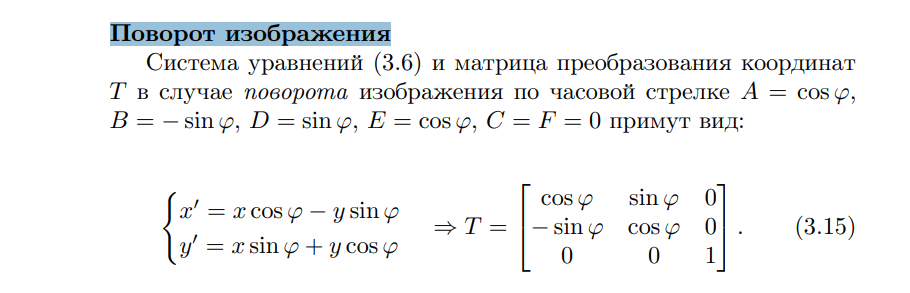

17


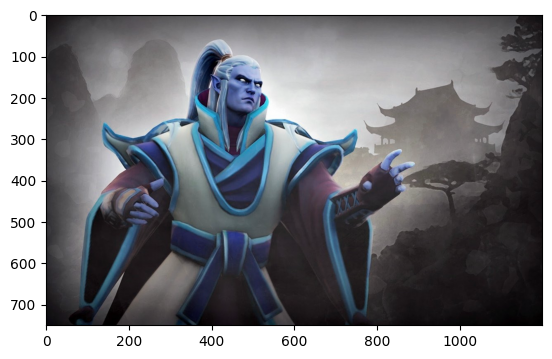

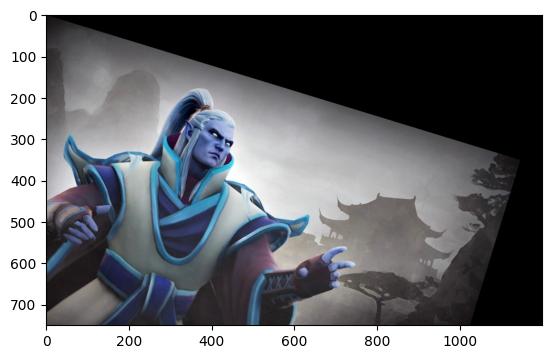

In [ ]:
#Однородное масштабирование изображения
imageObj = cv2.imread('обработка.jpg')
phi = float(input()) * math.pi / 180
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
T = np.float32([[ math.cos(phi) , -math.sin(phi), 0] , [ math.sin(phi) , math.cos(phi) , 0]])
I_rotate = cv2.warpAffine(imageObj, T, (cols, rows))
plt.imshow(I_rotate)
plt.show()

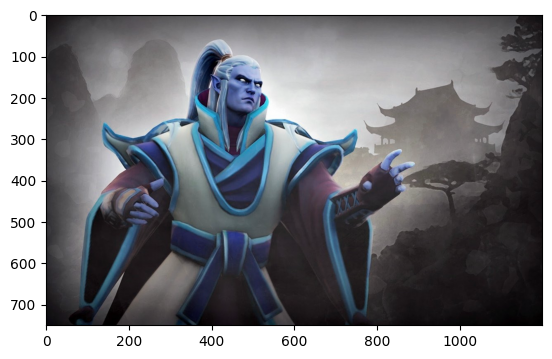

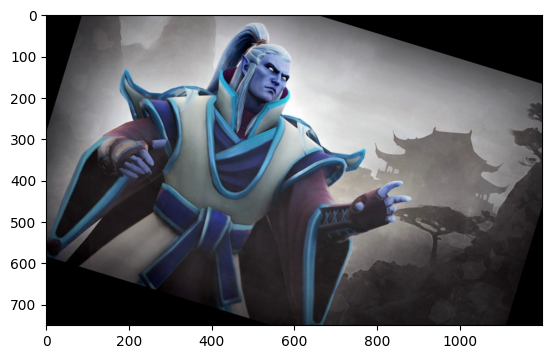

In [ ]:
#По умолчанию поворот происходит вокруг верхнего угла, сделаем поворот вокруг произвольной точки.
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
# Перемещаем в центр
T_shift_1 = np.float32([[1, 0, -(cols - 1) / 2],[0, 1, -(rows - 1) / 2], [0, 0, 1]] )
# Делаем поворот
phi = 17.0 * math.pi / 180
rows, cols = imageObj.shape[0:2]
T_rotate = np.float32([[ math.cos(phi) , -math.sin(phi), 0] , [ math.sin(phi) , math.cos(phi) , 0], [0, 0, 1]])
#Перемещение обратно
T_shift_2 = np.float32([[1, 0, (cols - 1) / 2],[0, 1, (rows - 1) / 2], [0, 0, 1]])
T_con = np.matmul(T_shift_2, np.matmul(T_rotate, T_shift_1))[0:2, :]
I_shift_2 = cv2.warpAffine(imageObj, T_con, (cols, rows))
plt.imshow(I_shift_2)
plt.show()

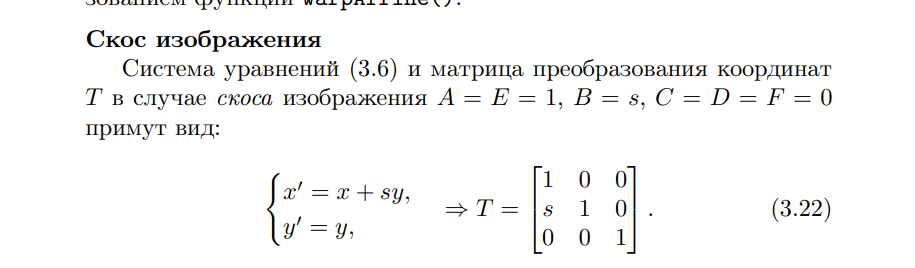

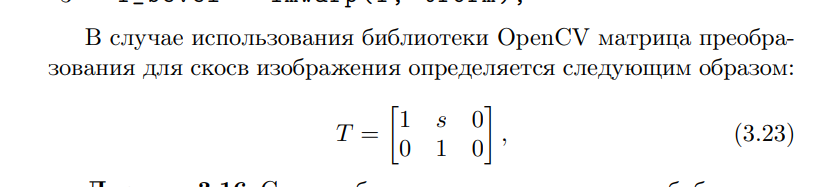

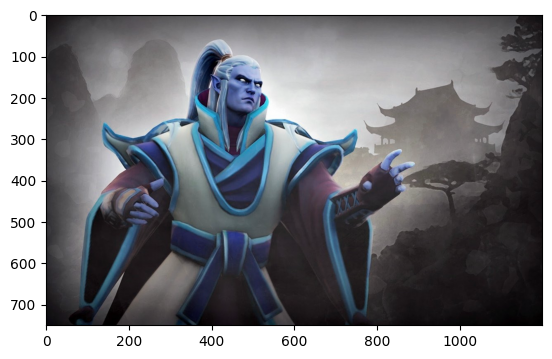

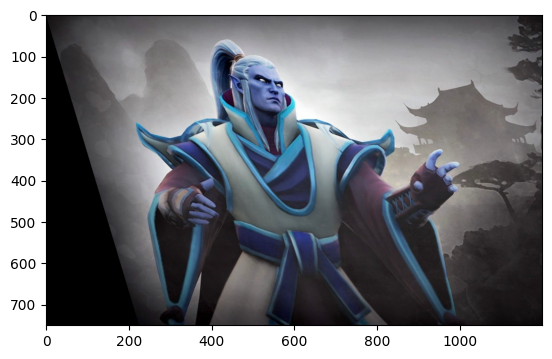

In [ ]:
#Скос
imageObj = cv2.imread('обработка.jpg')
s = 0.3
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
T = np.float32([[1 , s, 0] , [ 0 , 1 , 0]])
I_bevel = cv2.warpAffine(imageObj, T, (cols, rows))
plt.imshow(I_bevel)
plt.show()

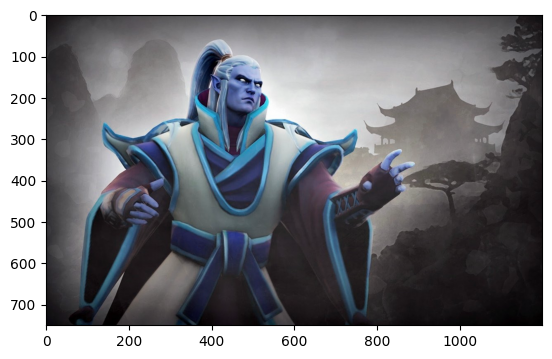

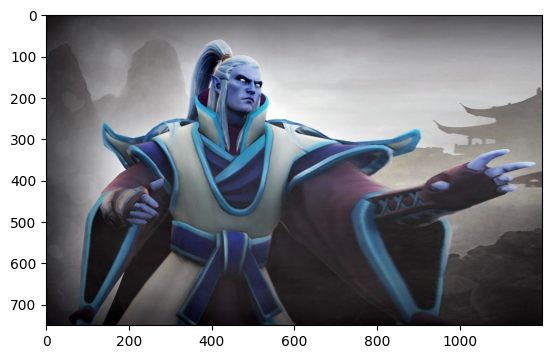

In [ ]:
#Кусочно-линейные преобразования
imageObj = cv2.imread('обработка.jpg')
s = 0.3
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]

stretch = 2
T = np.float32 ([[ stretch , 0 , 0] , [0 , 1 , 0]])
I_piecewiselinear = imageObj.copy ()
I_piecewiselinear [: , int ( cols / 2): , :] = \
cv2.warpAffine(I_piecewiselinear[: , int ( cols / 2): , :] ,T , ( cols - int ( cols / 2) , rows ))
plt.imshow(I_piecewiselinear)
plt.show()

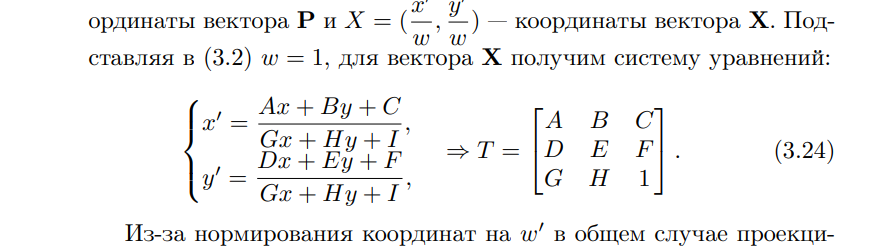

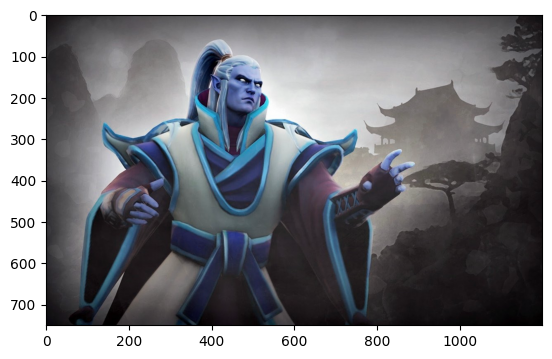

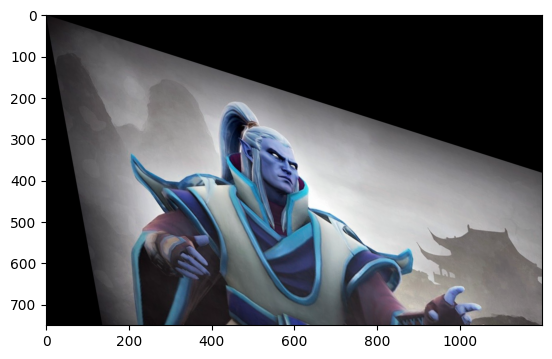

In [ ]:
#Проективное отображение
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
T = np.float32 ([[1.1 , 0.2 , 0.00075] ,[0.35 , 1.1 , 0.0005] ,[0 , 0 , 1]])
I_projective = cv2.warpPerspective (imageObj , T ,( cols , rows ))
plt.imshow(I_projective)
plt.show()

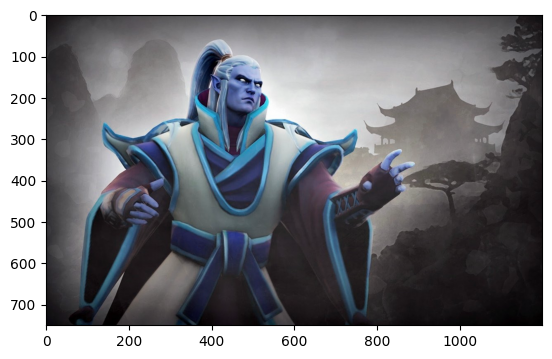

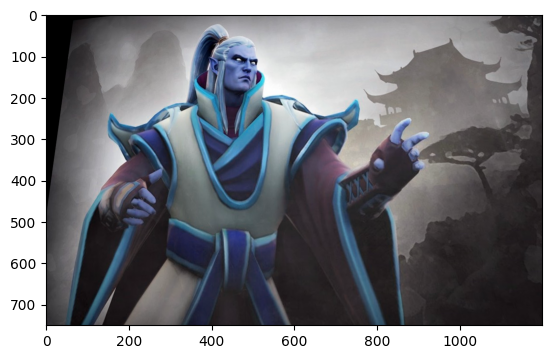

In [ ]:

imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
pts_src = np.float32([[50, 461], [461, 461], [461, 50], [50, 50]])
pts_dst = np.float32([[50, 461], [461, 440], [450, 10], [100, 50]])
T = cv2.getPerspectiveTransform(pts_src, pts_dst)
I_projective = cv2.warpPerspective (imageObj , T ,( cols , rows ))
plt.imshow(I_projective)
plt.show()

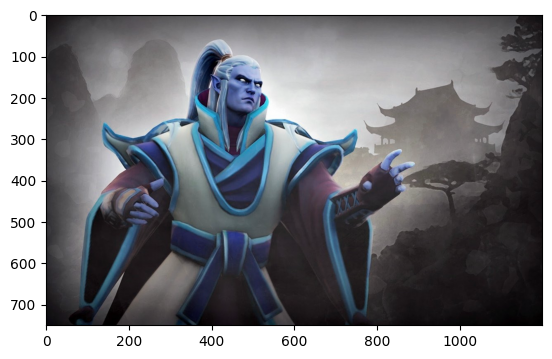

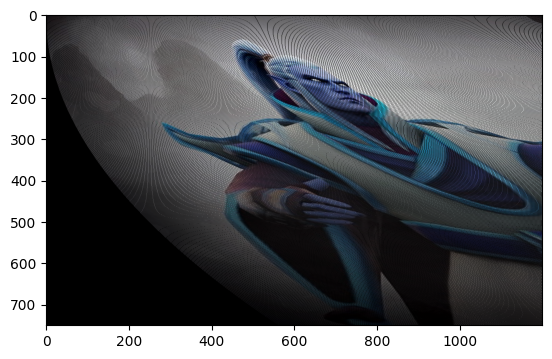

In [ ]:
#Полиномиальное преобразование
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
T = np.array([[0, 0],[1, 0],[0, 1],[0.00001 , 0],[0.002 , 0],[0.001 , 0]])
I_polynomial = np.zeros( imageObj.shape , imageObj.dtype)
x , y = np.meshgrid (np.arange (cols) ,np.arange (rows))
# Calculate all new X and Y coordinates
xnew = np.round ( T[0 , 0] + x * T[1 , 0] + y * T[2 , 0] + x*x* T[3 , 0] + x * y * T[4 , 0] + y * y * T[5 , 0]).astype(np.float32 )
ynew = np.round ( T[0 , 1] + x * T[1 , 1] + y * T[2 , 1] + x * x * T[3 , 1] + x * y * T[4 , 1] + y * y * T[5 , 1]).astype(np.float32)
mask = np.logical_and(np.logical_and(xnew >= 0 , xnew < cols), np.logical_and(ynew >= 0 , ynew < rows))
if imageObj.ndim == 2:
  I_polynomial [ynew[mask].astype(int) ,xnew[mask].astype(int)] = imageObj[y[mask],x[mask]]
else:
  I_polynomial [ynew[mask].astype(int) ,xnew[mask].astype(int), :] = imageObj[y[mask],x[mask], :]
plt.imshow(I_polynomial)
plt.show()

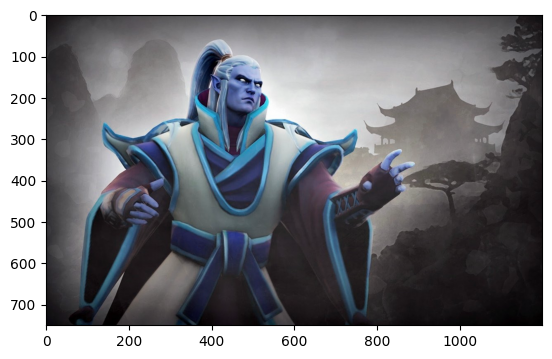

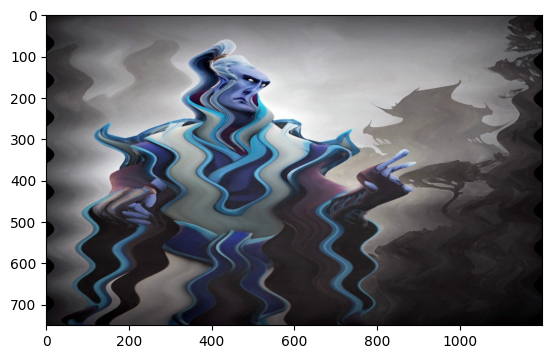

In [ ]:
#Синусоидальное искажение
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
u , v = np.meshgrid ( np.arange(cols) ,np.arange(rows))
u = u + 20 * np.sin (2 * math.pi * v / 90)
I_sinusoid = cv2.remap (imageObj , u.astype(np.float32 ) ,v.astype(np.float32 ) , cv2.INTER_LINEAR)
plt.imshow(I_sinusoid)
plt.show()

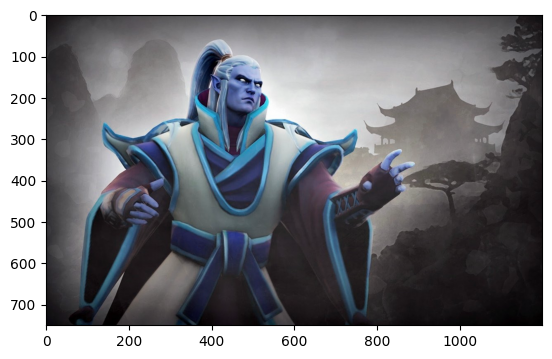

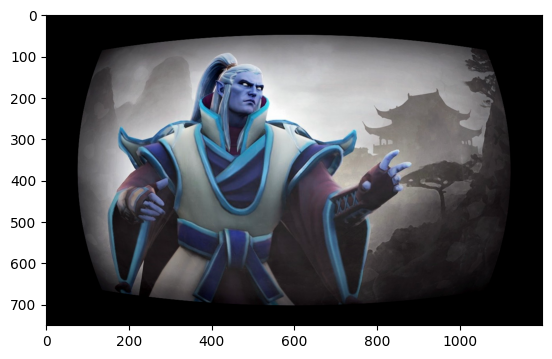

In [ ]:
#Бочкообразная дисторсия
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
# Create mesh grid for X , Y
xi , yi = np.meshgrid ( np.arange (cols) ,np.arange (rows))
# Shift and normalize grid
xmid = cols / 2.0
ymid = rows / 2.0
xi = xi - xmid
yi = yi - ymid
# Convert to polar and do transformation
r , theta = cv2.cartToPolar ( xi / xmid , yi / ymid )
F3 = 0.1
F5 = 0.12
r = r + F3 * r ** 3 + F5 * r ** 5
# Undo conversion , normalization and shift
u , v = cv2.polarToCart(r, theta)
u = u * xmid + xmid ;
v = v * ymid + ymid ;
# Do remapping
I_barrel = cv2.remap(imageObj , u.astype(np.float32) , v.astype(np.float32) , cv2.INTER_LINEAR )
plt.imshow(I_barrel)
plt.show()

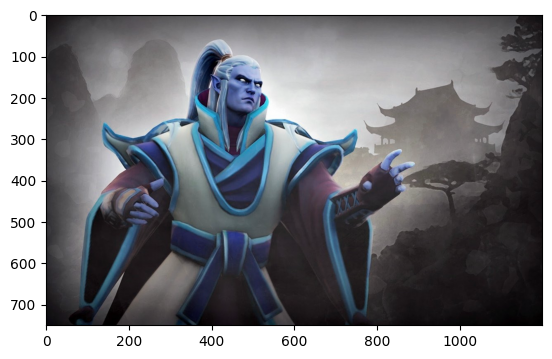

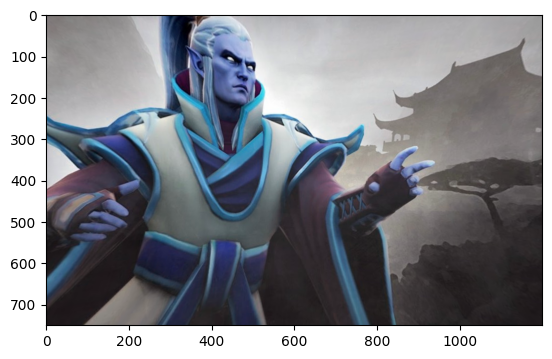

In [ ]:
#Подушкообразная дисторсия
imageObj = cv2.imread('обработка.jpg')
plt.imshow(imageObj)
plt.show()
rows, cols = imageObj.shape[0:2]
# Create mesh grid for X , Y
xi , yi = np.meshgrid ( np.arange (cols) ,np.arange (rows))
# Shift and normalize grid
xmid = cols / 2.0
ymid = rows / 2.0
xi = xi - xmid
yi = yi - ymid
# Convert to polar and do transformation
r , theta = cv2.cartToPolar ( xi / xmid , yi / ymid )
F3 = -0.25
r = r + F3 * r ** 2
# Undo conversion , normalization and shift
u , v = cv2.polarToCart(r, theta)
u = u * xmid + xmid ;
v = v * ymid + ymid ;
# Do remapping
I_barrel = cv2.remap(imageObj , u.astype(np.float32) , v.astype(np.float32) , cv2.INTER_LINEAR )
plt.imshow(I_barrel)
plt.show()

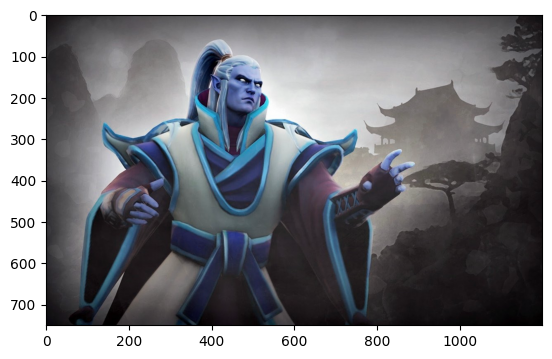

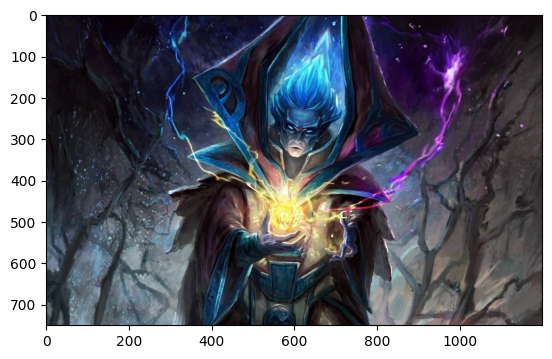

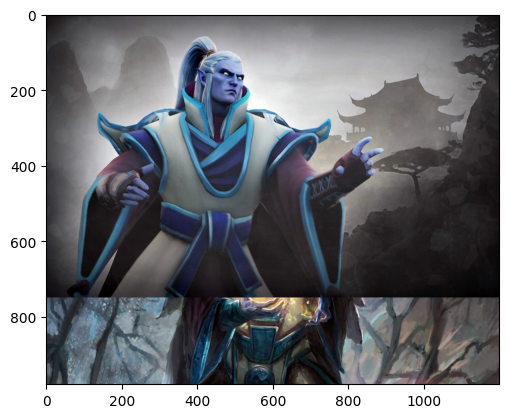

In [ ]:
#Сшивка изображений
top_part = cv2.imread('обработка.jpg', cv2.IMREAD_COLOR)
plt.imshow(top_part)
plt.show()
bot_part = cv2.imread('обработка_доп.jpg', cv2.IMREAD_COLOR)
plt.imshow(bot_part)
plt.show()
#Шаблон для вычисления кореляции
templ_size = 10
templ = top_part[ -templ_size : , : , :]
res = cv2.matchTemplate ( bot_part , templ ,cv2.TM_CCOEFF )
#Склейка будет в точке с максимальной корреляцией
min_val , max_val , min_loc , max_loc = cv2.minMaxLoc(res)
result_img = np.zeros (( top_part.shape[0] + bot_part.shape[0] - max_loc[1] - templ_size , top_part.shape[1] ,top_part.shape[2]) \
                       , dtype = np . uint8 )
result_img [0: top_part.shape[0] , : , :] = top_part
result_img [top_part.shape[0]: , : , :] = bot_part[ max_loc[1] + templ_size : , : , :]
plt.imshow(result_img)
plt.show()

In [ ]:
#Автоматическая склейка изображений в библиотеке OpenCV
top_part = cv2.imread('обработка.jpg', cv2.IMREAD_COLOR)
bot_part = cv2.imread('обработка_доп.jpg', cv2.IMREAD_COLOR)
# stitcher = cv2.Stitcher.create(cv2.Stitcher_PANORAMA)
# status , I_stitch = stitcher.stitch([ top_part , bot_part ])
# plt.imshow(I_stitch)
# plt.show()
top_part=cv2.resize(top_part,(0,0),fx=0.4,fy=0.4)
bot_part=cv2.resize(bot_part,(0,0),fx=0.4,fy=0.4)

stitchy=cv2.Stitcher.create()
(dummy,output)=stitchy.stitch([top_part , bot_part ])

if dummy != cv2.STITCHER_OK:
  # checking if the stitching procedure is successful
  # .stitch() function returns a true value if stitching is
  # done successfully
    print("stitching ain't successful")
else:
    print('Your Panorama is ready!!!')
    cv2_imshow(output)

stitching ain't successful
